## 1. EDA

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,794 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default') # matplotlib 테마
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록v
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
DIR = '/content/drive/MyDrive/Colab Notebooks/ValuableSalary/'
MAX = 999999999
data = pd.read_csv(DIR+"data.csv")
data

,6to8,8to12,12to14,14to18,18to20,20to22,22to2,2to6,Sex,Age,MaxSalary
0,inf,10000.0,10000.0,10000.0,10000.0,8720.0,13080.0,inf,F,25,11000
1,8720.0,8720.0,8720.0,inf,8720.0,inf,13080.0,inf,M,24,8720
2,inf,inf,inf,inf,inf,inf,inf,inf,F,25,10000
3,inf,inf,8720.0,inf,inf,inf,inf,inf,M,24,8730
4,12000.0,15000.0,8720.0,8720.0,8720.0,10000.0,15000.0,inf,F,23,25000
5,inf,12000.0,10000.0,10000.0,10000.0,10000.0,13080.0,inf,F,23,10000
6,inf,8720.0,8720.0,8720.0,8720.0,12000.0,13080.0,13080.0,M,23,8500
7,inf,8720.0,8720.0,8720.0,8720.0,inf,inf,inf,F,23,35000
8,15000.0,inf,15000.0,inf,15000.0,inf,inf,inf,M,24,10000
9,10000.0,inf,8720.0,inf,12000.0,12000.0,13080.0,inf,F,23,30000


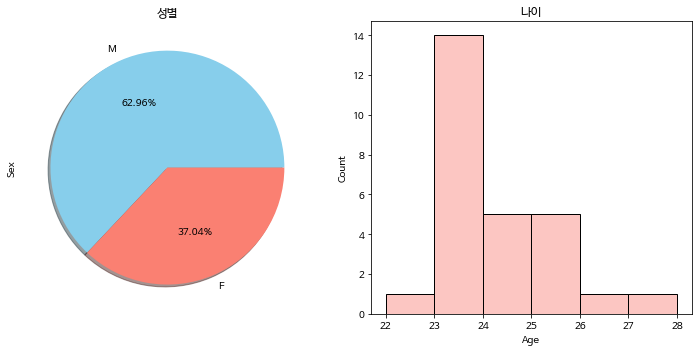

In [ ]:
f, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
sns.set_palette("Pastel1")
data.Sex.value_counts().plot.pie(autopct='%.2f%%', ax=axes[0], shadow=True, colors=['skyblue', 'salmon'])
axes[0].set_title("성별")
sns.histplot(x=data.Age, ax=axes[1])
axes[1].set_title("나이")
# plt.suptitle("설문 참여자 통계(총 {}명)".format(len(data)), size = 15)
f.tight_layout()
plt.show()

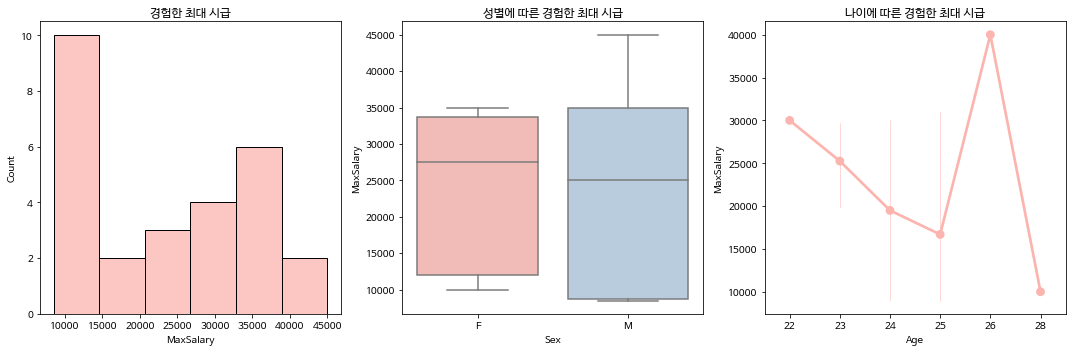

In [ ]:
f, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
sns.histplot(x=data.MaxSalary, ax=axes[0])
axes[0].set_title("경험한 최대 시급")
sns.boxplot(x='Sex',y='MaxSalary',data=data, ax = axes[1])
axes[1].set_title("성별에 따른 경험한 최대 시급")
sns.pointplot(x='Age', y = 'MaxSalary', data = data, ax=axes[2], errwidth=0.5)
axes[2].set_title("나이에 따른 경험한 최대 시급")
f.tight_layout()
plt.show()

In [ ]:
data = data.replace([np.inf, -np.inf], MAX)

In [ ]:
df = pd.DataFrame(columns = ["Time", "Wanted Salary", "Sex", "Age"])
for row in data.values:
    sex = row[8]
    age = row[9]
    for time in range(24):
        if time>=6 and time<8:
            salary = row[0]
        elif time>=8 and time <12:
            salary = row[1]
        elif time>=12 and time <14:
            salary = row[2]
        elif time>=14 and time<18:
            salary = row[3]
        elif time>= 18 and time<20:
            salary = row[4]
        elif time>= 20 and time<22:
            salary = row[5]
        elif time>= 22 or time<2:
            salary = row[6]
        else:
            salary = row[7]
        # if salary <MAX: 
        df = df.append({"Time": time, "Wanted Salary": salary, "Sex": sex, "Age": age}, ignore_index=True)

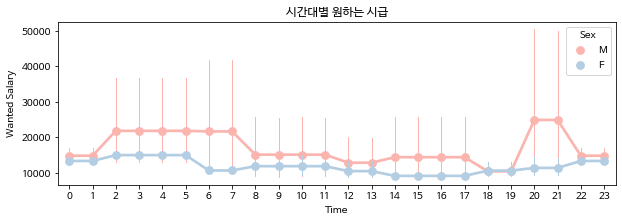

In [ ]:
f, axes = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
sns.pointplot(x='Time', y = 'Wanted Salary', data = df, hue = "Sex", hue_order=["M", "F"], ax = axes, errwidth=1)
axes.set_title("시간대별 원하는 시급")
# axes.set_ylim([8000,30000])
plt.show()

## 2. Simulation

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product
import random

In [ ]:
class Agent:
    def __init__(self, limit, no:int):
        self.id = no
        self.limit = limit
        self.expected = limit
        self.adjustment = 500
        self.hadTransaction = False
        self.workCount = 0
        self.suggestCount = 0
        
    def setExpected(self, value):
        self.expected = max(value, self.limit)
    
    def makeTransaction(self):
        self.hadTransaction = True
        
    def willTransact(self, price):
        pass
    
    def reflect(self):
        pass

In [ ]:
class Employer(Agent):
    def __repr__(self):
        return "Employer{}({})".format(self.id, self.expected)
    
    def willTransact(self, price):
        self.suggestCount += 1
        if(not self.hadTransaction and price <= self.expected):
            self.workCount += 1
            return True
        return False
    
    def reflect(self):
        if (self.hadTransaction):
            self.setExpected(self.expected-self.adjustment)
        else:
            self.setExpected(self.expected+self.adjustment)
        
        self.hadTransaction = False

In [ ]:
class Employee(Agent):
    def __repr__(self):
        return "Employee{}({})".format(self.id, self.expected)
    
    def willTransact(self, price):
        self.suggestCount += 1
        if(not self.hadTransaction and price >= self.expected):
            self.workCount += 1
            return True
        return False
    
    def reflect(self):
        if (self.hadTransaction):
            self.setExpected(self.expected+self.adjustment)
        else:
            self.setExpected(self.expected-self.adjustment)
        self.hadTransaction = False

In [ ]:
def createEmployee(n, limit, time=0):
    collection = []
    for i in range(n):
        salary = df[df.Time==time].sample(n=1).iloc[0]["Wanted Salary"]
        emp = Employee(limit, i)
        emp.setExpected(salary)
        collection.append(emp)
    return collection

def createEmployer(n, limit, pdf=None, time=0):
    collection = []
    if pdf == None:
        for i in range(n):
            emp = Employer(limit, i)
            emp.setExpected(limit+np.random.normal(0, 1000))
            collection.append(emp)
    return collection

In [ ]:
def simulate(combi, day, interview, result, time):
    for d in range(day):
        # print("<<DAY{}>>".format(d))
        priceSum, priceCnt = 0, 0
        random.shuffle(combi)
        for i in range(interview):
            employer, employee = combi[i]
            price = employer.expected
            if(not employer.hadTransaction and employee.willTransact(price)):
                # print(employer, employee)
                priceSum += price
                result = result.append({"Time": time, "Day":d, "Salary": price}, ignore_index=True)
                employer.makeTransaction()
                employee.makeTransaction()
        # result.append(priceSum/priceCnt if priceCnt!=0 else 0)
        if priceSum == 0:
            result = result.append({"Time": time, "Day": d, "Salary": 0}, ignore_index=True)
        for emp in employers:
            emp.reflect()
        for emp in employees:
            emp.reflect()
            
    return result

In [ ]:
num_employer = 10
num_employee = 50
day = 50
interview = num_employer*50

In [ ]:
result = pd.DataFrame(columns = ["Time", "Day", "Salary"])
for t in range(24):
    if t>=22 or t<6:
        LIMIT = 13080
    else:
        LIMIT = 8720
    employees = createEmployee(num_employee, LIMIT, time = t)
    employers = createEmployer(num_employer, LIMIT)
    combi =  list(product(employers, employees))
    result = simulate(combi, day, interview, result, t)

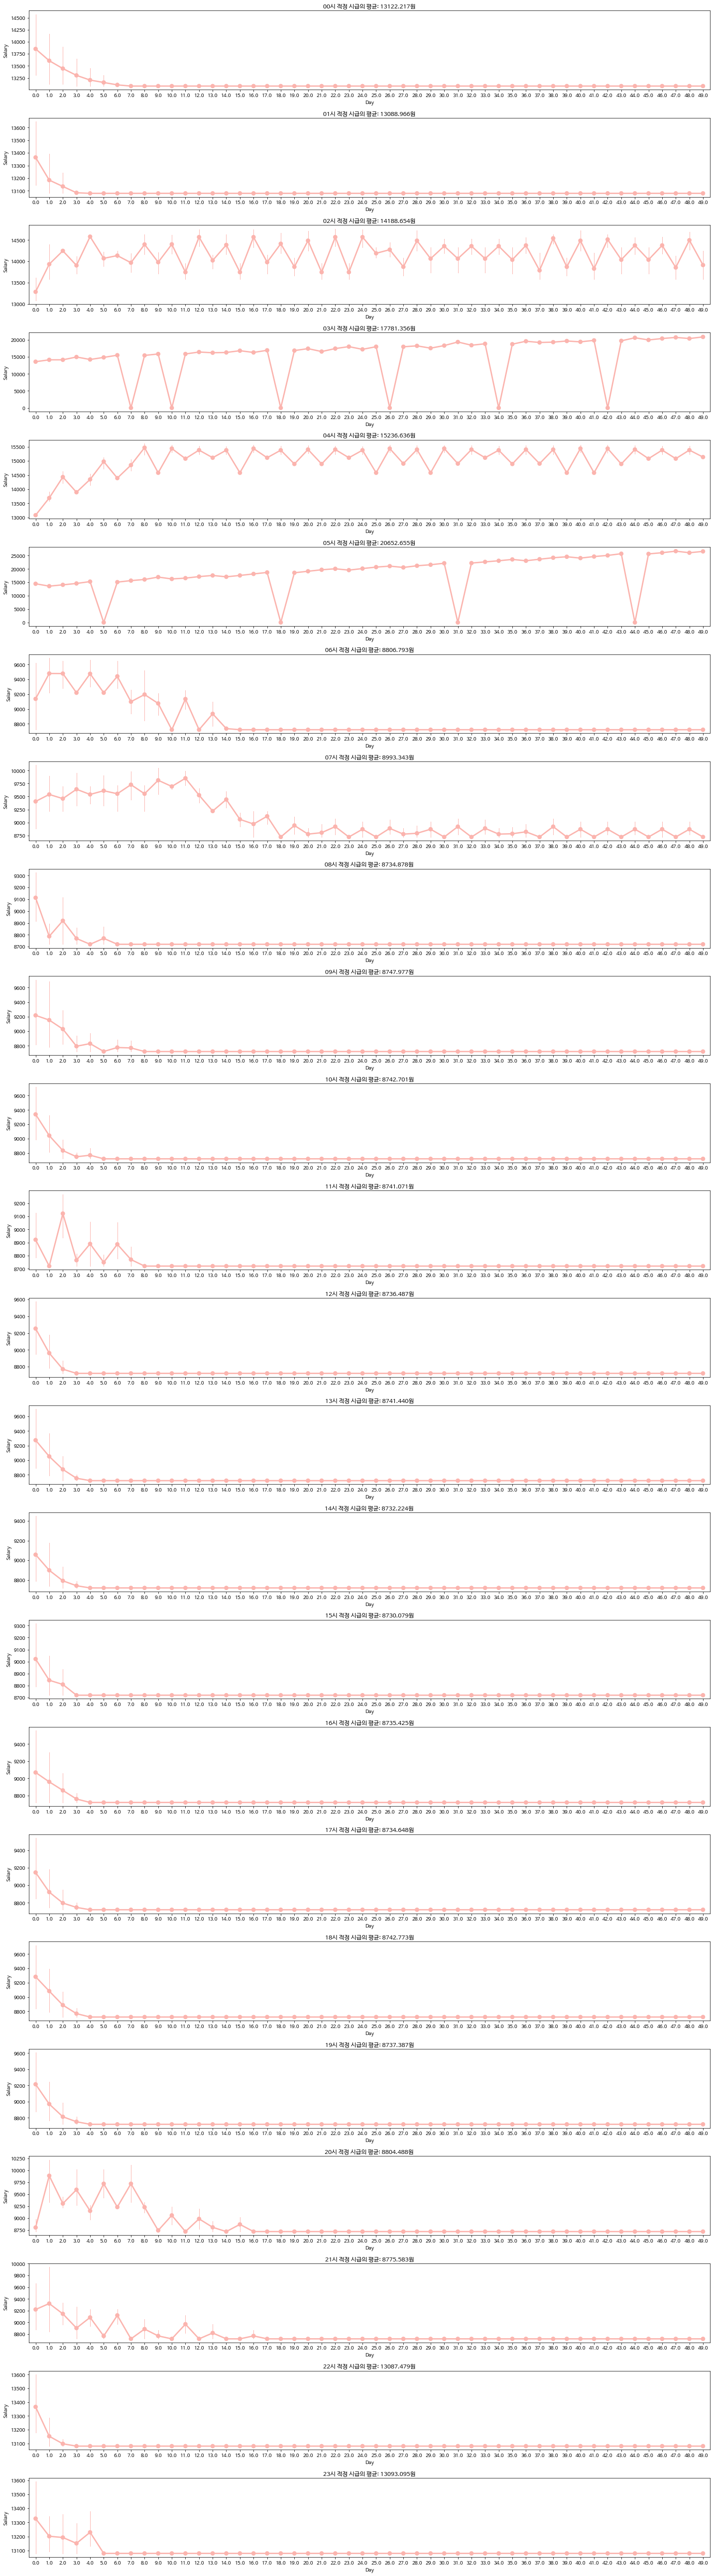

In [ ]:
f, axes = plt.subplots(ncols=1, nrows=24, figsize=(20, 3*24))
summary = {"Time":[], "Salary":[]}
for i in range(24):
    dat = result[result.Time==i]
    mean = dat[dat.Salary>0].Salary.mean()
    summary["Time"].append(i)
    summary["Salary"].append(mean)
    sns.pointplot(x="Day", y="Salary", data = dat , ax= axes[i], errwidth = 1)
    axes[i].set_title("{0:02d}시 적정 시급의 평균: {1:.3f}원".format(i, mean))
f.tight_layout()
plt.show()

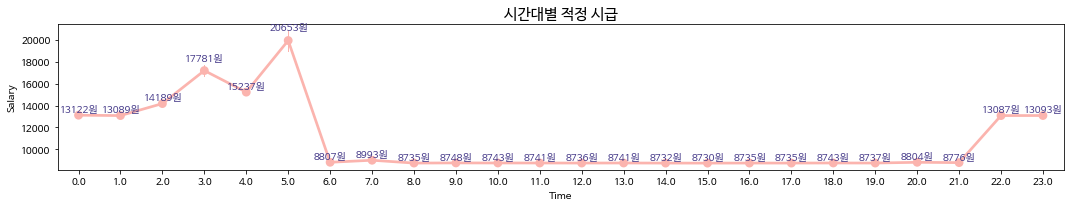

In [ ]:
f, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 3))
# sns.lineplot(x="Time", y="Salary", data=summary, ax=axes)
sns.pointplot(x="Time", y="Salary", data = result , ax= axes, errwidth = 1)
ymin, ymax = axes.get_ylim()
bonus = (ymax - ymin) / 50 # still hard coded bonus but scales with the data
for x, y in zip(summary["Time"], summary["Salary"]):
    axes.text(x, y + bonus, "{0:.0f}원".format(y), color='darkslateblue', horizontalalignment ="center" )
axes.set_title("시간대별 적정 시급", size = 15)    
f.tight_layout()
plt.show()